In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats

In [28]:
customer_df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv')
engagment_df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv')
marketing_df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv')
transactions_df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv')

In [29]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10000 non-null  int64  
 1   join_date           10000 non-null  object 
 2   last_purchase_date  10000 non-null  object 
 3   age                 8991 non-null   float64
 4   gender              9467 non-null   object 
 5   location            10000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


In [30]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129545 entries, 0 to 129544
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   transaction_id      129545 non-null  int64  
 1   customer_id         129545 non-null  int64  
 2   transaction_date    129545 non-null  object 
 3   transaction_amount  129545 non-null  float64
 4   product_category    129545 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.9+ MB


In [19]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   campaign_id     25200 non-null  int64 
 1   customer_id     25200 non-null  int64 
 2   response        25200 non-null  object
 3   promotion_type  25200 non-null  object
 4   campaign_date   25200 non-null  object
dtypes: int64(2), object(3)
memory usage: 984.5+ KB


In [31]:
engagment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   customer_id              10000 non-null  int64
 1   number_of_site_visits    10000 non-null  int64
 2   number_of_emails_opened  10000 non-null  int64
 3   number_of_clicks         10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


In [32]:
#Convert Join_date and last_purchase_date data type to date in customer_df
customer_df['join_date'] = pd.to_datetime(customer_df['join_date'])
customer_df['last_purchase_date'] = pd.to_datetime(customer_df['last_purchase_date'])

#Convert transaction_date data type to date in transaction_df
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'])

#Convert campaign_date data type to date in marketing_df
marketing_df['campaign_date'] = pd.to_datetime(marketing_df['campaign_date'])

#Convert product_category data type to category
transactions_df['product_category'] = transactions_df['product_category'].astype('category')

In [33]:
transactions_df.head()

,transaction_id,customer_id,transaction_date,transaction_amount,product_category
0,1,1,2024-02-03,165.56,Clothing
1,2,1,2024-03-02,699.01,Home Goods
2,3,1,2024-03-12,146.86,Home Goods
3,4,1,2024-01-20,927.46,Electronics
4,5,1,2024-02-25,1395.87,Electronics


In [34]:
customer_df.head()

,customer_id,join_date,last_purchase_date,age,gender,location
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville
2,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort


In [35]:
marketing_df.head()

,campaign_id,customer_id,response,promotion_type,campaign_date
0,1,1,No,Buy One Get One,2024-02-29
1,2,1,No,Discount,2024-01-24
2,3,1,No,Free Shipping,2024-03-05
3,4,1,Yes,Buy One Get One,2024-01-10
4,5,2,Yes,Free Shipping,2022-07-08


In [36]:
engagment_df.head()

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
0,1,10,15,1
1,2,285,49,51
2,3,192,73,25
3,4,110,30,17
4,5,161,2,7


In [37]:
transactions_df.isnull().sum()/100 

transaction_id        0.0
customer_id           0.0
transaction_date      0.0
transaction_amount    0.0
product_category      0.0
dtype: float64

In [38]:
marketing_df.isnull().sum()/100 

campaign_id       0.0
customer_id       0.0
response          0.0
promotion_type    0.0
campaign_date     0.0
dtype: float64

In [39]:
engagment_df.isnull().sum()/100 

customer_id                0.0
number_of_site_visits      0.0
number_of_emails_opened    0.0
number_of_clicks           0.0
dtype: float64

In [12]:
customer_df.isnull().sum()/100 

customer_id            0.00
join_date              0.00
last_purchase_date     0.00
age                   10.09
gender                 5.33
location               0.00
dtype: float64

<Axes: ylabel='transaction_amount'>

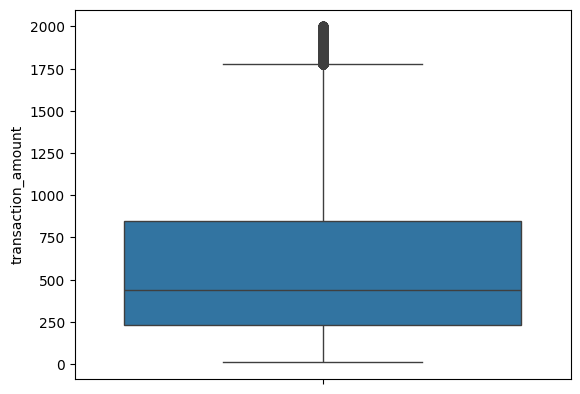

In [41]:
sns.boxplot(transactions_df['transaction_amount'])


In [ ]:
df.groupby('Customer_ID')[['Customer_Age_Months', 'Gender', 'Campaign_Exposure','Transaction_Category', 'Purchase_Amount', 'Premium_Product']].agg({'Customer_Age_Months':'max', 'Campaign_Exposure':'max', 'Purchase_Amount':'mean', 'Premium_Product':'mean'})
cust_level = df.groupby('Customer_ID')[['Customer_Age_Months', 'Gender', 'Campaign_Exposure','Transaction_Category', 'Purchase_Amount', 'Premium_Product']].agg({'Customer_Age_Months':'max', 'Campaign_Exposure':'max', 'Purchase_Amount':'mean', 'Premium_Product':'mean'})